In [6]:
!pip install pandas_datareader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [7]:
!pip install yfinance

In [8]:
import yfinance as yf
start = '2010-01-01'
end = '2019-12-31'
df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375155,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [9]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.170479,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.236229,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.609917,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.583122,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.002037,144114400


In [10]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375155,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [11]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


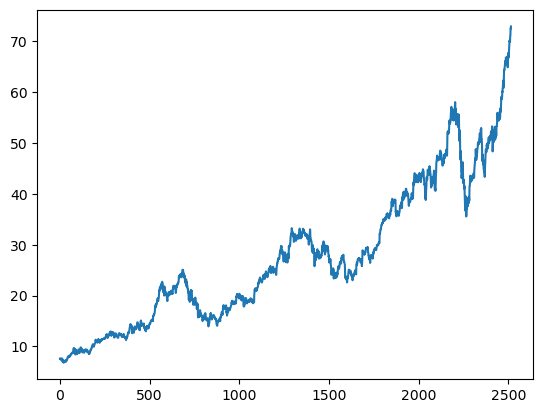

In [12]:
plt.plot(df.Close)

In [13]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [14]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

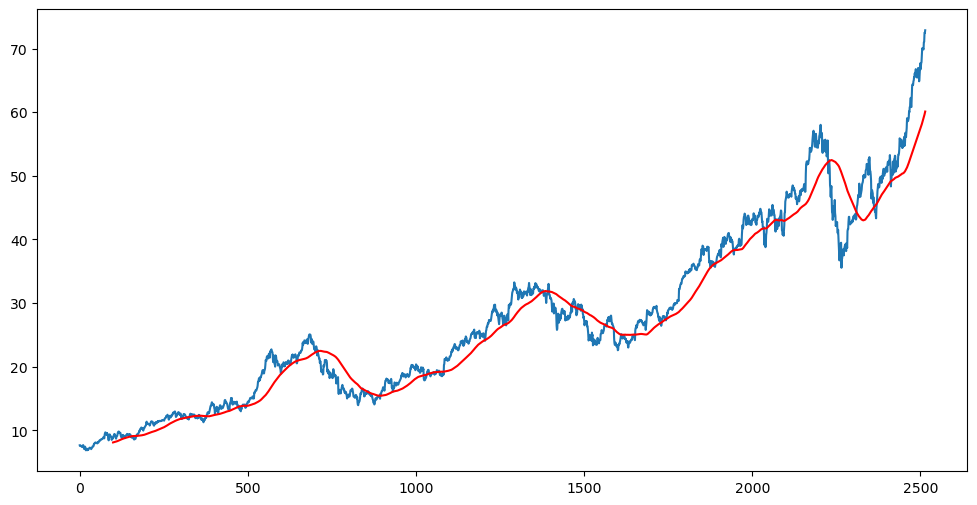

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [16]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

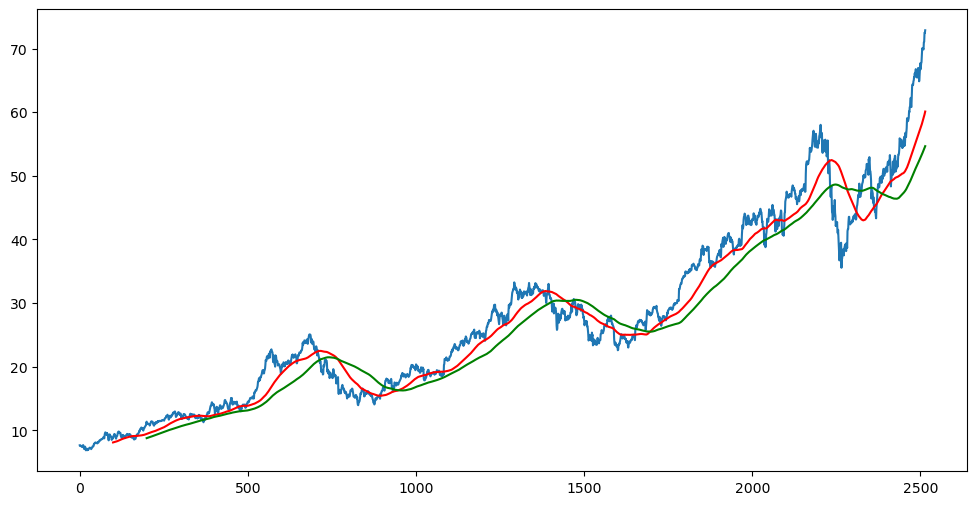

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [18]:
df.shape

(2515, 5)

In [19]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)


(1760, 1)
(755, 1)


In [20]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [21]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [23]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [24]:
x_train=[]
y_train=[]
for i in range(100,data_training.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)           

In [25]:
!pip install keras


In [26]:
!pip install tensorflow


In [27]:
pip install --upgrade keras tensorflow


  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/ca/48/643d21747d52fa380f572f76c493779fc5b4bd03605247209d2dd0a6d9a9/keras-3.0.2-py3-none-any.whl.metadata
  Using cached keras-3.0.2-py3-none-any.whl.metadata (4.8 kB)
Note: you may need to restart the kernel to use updated packages.


In [29]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [30]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
          
model.add(Dense(units=1))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [33]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=50)

Epoch 1/50

52/52 [==============================] - 10s 116ms/step - loss: 0.0672
Epoch 2/50
52/52 [==============================] - 6s 109ms/step - loss: 0.0160
Epoch 3/50
52/52 [==============================] - 6s 111ms/step - loss: 0.0101
Epoch 4/50
52/52 [==============================] - 6s 115ms/step - loss: 0.0087
Epoch 5/50
52/52 [==============================] - 6s 112ms/step - loss: 0.0092
Epoch 6/50
52/52 [==============================] - 6s 112ms/step - loss: 0.0089
Epoch 7/50
52/52 [==============================] - 6s 115ms/step - loss: 0.0086
Epoch 8/50
52/52 [==============================] - 6s 118ms/step - loss: 0.0082
Epoch 9/50
52/52 [==============================] - 6s 113ms/step - loss: 0.0081
Epoch 10/50
52/52 [==============================] - 6s 115ms/step - loss: 0.0073
Epoch 11/50
52/52 [==============================] - 6s 115ms/step - loss: 0.0076
Epoch 12/50
52/52 [==============================] - 6s 113ms/step - loss: 0.0065
Epoch 13/50
52/52 [====

In [36]:
model.save('keras_model.h5')

In [37]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [41]:
data_training.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [42]:
past_100_days=data_training.tail(100)

In [47]:
print(hasattr(past_100_days, 'append'))


False


In [49]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [50]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [51]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [53]:
input_data.shape

(855, 1)

In [55]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
         

In [56]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [57]:
y_predicted=model.predict(x_test)

24/24 [==============================] - 1s 34ms/step


In [58]:
y_predicted.shape

(755, 1)

In [59]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [60]:
y_predicted

array([[0.1274256 ],
       [0.12820438],
       [0.12895383],
       [0.12965207],
       [0.13028537],
       [0.13084637],
       [0.13134056],
       [0.13178988],
       [0.13222407],
       [0.13266863],
       [0.1331433 ],
       [0.13365008],
       [0.13418643],
       [0.1347543 ],
       [0.13534862],
       [0.13595971],
       [0.13657865],
       [0.13719516],
       [0.13781005],
       [0.13844159],
       [0.13910113],
       [0.13978943],
       [0.14049518],
       [0.14126422],
       [0.14220886],
       [0.1434088 ],
       [0.14492235],
       [0.14679219],
       [0.1490158 ],
       [0.15156311],
       [0.15440767],
       [0.15750223],
       [0.16078976],
       [0.16419844],
       [0.1677052 ],
       [0.17127813],
       [0.1748877 ],
       [0.17850827],
       [0.18210042],
       [0.18561536],
       [0.18900687],
       [0.19223437],
       [0.19530264],
       [0.19821897],
       [0.20097412],
       [0.203579  ],
       [0.20603564],
       [0.208

In [61]:
scaler.scale_

array([0.02123255])

In [62]:
scale_factor=1/0.02123255
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

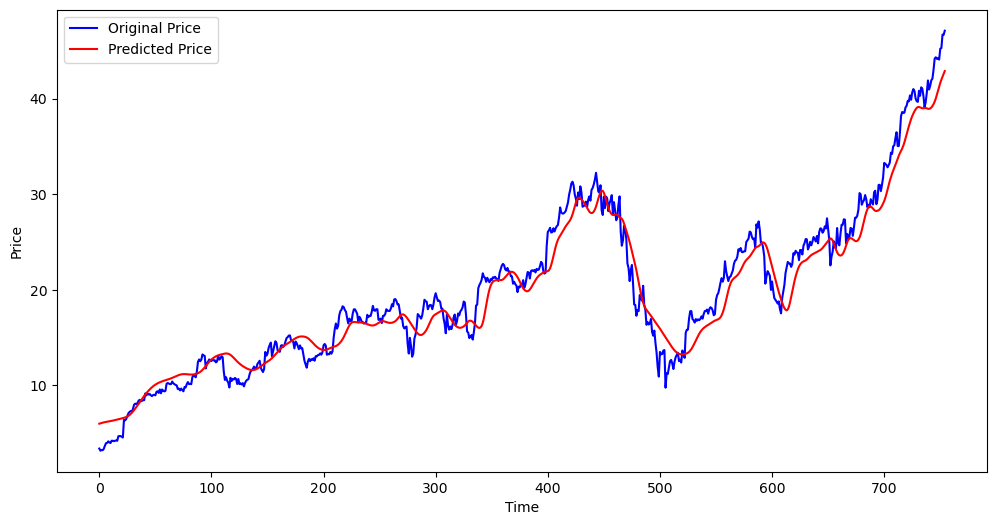

In [66]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()